In [1]:
import numpy as np
import pandas as pd

In [ ]:
## the model equation
## y=ax+b

![image.png]()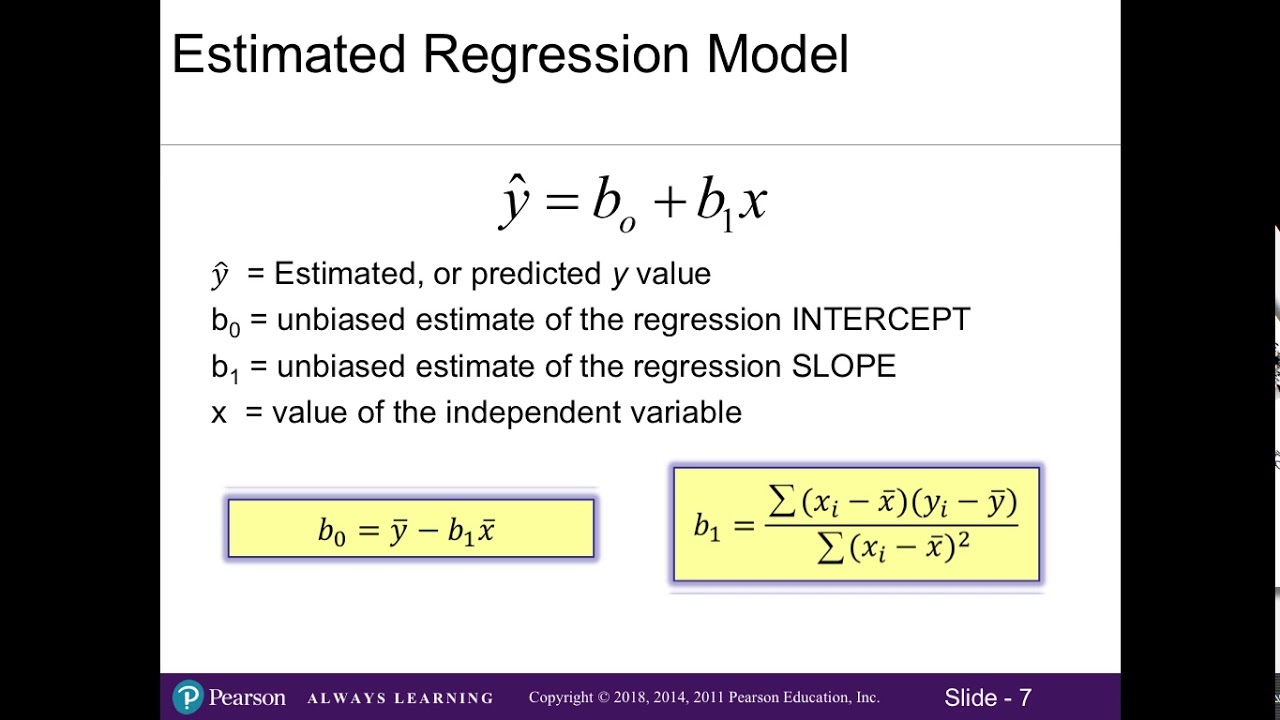

In [ ]:
## finding the a
def intercepte(X,y):
  # find the mean of x
  x_mean=np.mean(X)
  # find the mean of y
  y_mean=np.mean(y)
  return np.sum((X-x_mean)*(y-y_mean))/np.sum((X-x_mean)**2)


def slope(X,y):
  y_mean=np.mean(y)
  x_mean=np.mean(X)
  a=intercepte(X,y)
  return y_mean - a * x_mean


def simple_linear_regression(X,y):
  return slope(X,y),intercepte(X,y)

In [9]:
np.random.seed(42)  # for reproducibility

# Create 100 points between 0 and 50
x = np.linspace(0, 50, 100)
# True relation: y = 3x + 7 + noise
noise = np.random.normal(0, 5, size=x.shape)
y = 3 * x + 7 + noise

# 2. Split into train and test (80% train, 20% test)
split_index = int(0.8 * len(x))
x_train, x_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [ ]:
b,a=simple_linear_regression(x_train,y_train)

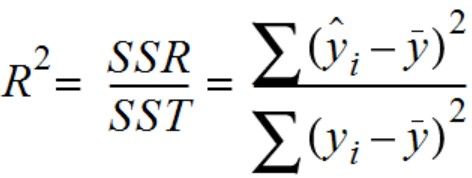

In [ ]:
y_hat=x_test*a+b

In [ ]:
np.sum(y_hat-np.mean(y_train)**2)/np.sum((y-np.mean(y_train)**2))

np.float64(0.19717501743460253)

In [ ]:
pd.DataFrame(y_hat,y_test)

,0
127.113762,127.835401
131.512836,129.356540
138.631894,130.877679
130.166225,132.398818
130.230259,133.919956
133.279094,135.441095
141.880041,136.962234
140.461937,138.483372
137.684532,140.004511
144.414822,141.525650


In [ ]:
1-np.sum((y_test-y_hat)**2)/np.sum((y-np.mean(y_train))**2)

np.float64(0.9989539548952264)

In [ ]:
## implementing the simple linear regression using OOB
class SimpleLinearRegression:
    def __init__(self):
        self.slope_=None
        self.intercept_ = None
    
    def fit(self,x,y):
        # find the mean of x
        x_mean=np.mean(x)
        # find the mean of y
        y_mean=np.mean(y)
        slope=np.sum((x-x_mean)*(y-y_mean))/np.sum((x-x_mean)**2)
        self.slope_ = slope
        # find the slope
        self.intercept_=y_mean - slope * x_mean

    def predict(self,x):
        if self.intercept_ is None or self.slope_ is None:
            raise ValueError('Model is not fitted yet. try to run fit method first')
        return self.slope_ *x + self.intercept_
    
    ## calculating mse
    def mse(self,x,y):
        if self.intercept_ in None or self.slope_ is None:
            raise ValueError('Model in not fitted yet ,try to run fit method first')
        y_hat=self.predict(x)
        return np.mean((y - y_hat) ** 2)
    ## calculating rmse
    def rmse(self,x,y):
        if self.intercept_ is None or self.slope_ is None:
            raise ValueError('Model is not fitted yet. try to run fit method first')
        return np.sqrt(self.mse(x,y))
    
    #calculating mae
    def mae(self,x,y):
        if self.intercept_ is None or self.slope_ is None:
            raise ValueError('Model is not fitted yet. try to run fit method first')
        y_hat=self.predict(x)
        return np.mean(np.abs(y - y_hat))

    ## calculating r2 score
    def score(self,x,y):
        if self.intercept_ is None or self.slope_ is None:
            raise ValueError('Model is not fitted yet. try to run fit method first')
        y_hat=self.predict(x)
        error_squared =np.sum((y-y_hat)**2)
        total_squared = np.sum((y-np.mean(y))**2)
        return 1 - error_squared / total_squared


Slope: 3.0118546248869618
Intercept: 6.144305462537197
Score: 0.8503830480918315
Predictions for new values: [36.26285171 66.38139796 96.49994421]


In [59]:
## using gradient descent
def use_gradient_descent(x,y):
    intercept = 0
    slope = 0
    step_size = 0.05
    tolerance = 0.01
    step=1
    max_steps = 10000
    ## usufules values
    values=[]
    while True:
        ## predicted values
        y_hat=slope*x + intercept
        errors=y_hat-y
        #Update the intercept:
        derivative_intercept=np.mean(errors)
        adjustment =step_size * derivative_intercept
        intercept -=adjustment
        #Update the slope:
        derivative_slope=np.mean(errors * x)
        adjustment =step_size * derivative_slope
        slope -= adjustment
        # Calculate magnitude 
        magnitude = np.sqrt(derivative_slope**2 + derivative_intercept**2)
        print(f'Adjustment: intercept={adjustment}, slope={slope} , magnitude={magnitude}')
        values.append({intercept, slope, magnitude})
        if magnitude < tolerance or step > max_steps:
            break
        step += 1
    
    print(f'Final intercept={intercept}, slope={slope}')
    return intercept, slope 


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def use_gradient_descent_plot(x, y):
    intercept = 0
    slope = 0
    step_size = 0.0005
    tolerance = 0.01
    step = 1
    max_steps = 100
    gradients = []

    # Normalize colors between 0 and 1
    color_map = cm.get_cmap('coolwarm', max_steps)

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label='Data points', color='black')

    while True:
        y_hat = slope * x + intercept
        errors = y_hat - y

        derivative_intercept = np.mean(errors)
        intercept -= step_size * derivative_intercept

        derivative_slope = np.mean(errors * x)
        slope -= step_size * derivative_slope

        magnitude = np.sqrt(derivative_slope**2 + derivative_intercept**2)
        
        # Plot the regression line at this step
        color = color_map(step / max_steps)  # transition from blue to red
        y_line = slope * x + intercept
        plt.plot(x, y_line, color=color, alpha=0.5 ,label=f'Step {step}')
        
        if magnitude < tolerance or step >= max_steps:
            break
        step += 1

    plt.title("Gradient Descent Progression")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'Final intercept={intercept}, slope={slope}')
    return float(intercept), float(slope)


In [61]:
use_gradient_descent(x_train, y_train)

Adjustment: intercept=-86.5455538647318, slope=86.5455538647318 , magnitude=1732.1776685930329
Adjustment: intercept=2227.5309004671135, slope=-2140.9853466023815 , magnitude=44581.66892424552
Adjustment: intercept=-57330.69702288396, slope=55189.71167628157 , magnitude=1147414.6193871472
Adjustment: intercept=1475541.0655094897, slope=-1420351.353833208 , magnitude=29531427.183157258
Adjustment: intercept=-37976536.73845624, slope=36556185.384623036 , magnitude=760061077.0853368
Adjustment: intercept=977415931.8656718, slope=-940859746.4810487 , magnitude=19561968248.84916
Adjustment: intercept=-25156109162.098675, slope=24215249415.617626 , magnitude=503473488257.5993
Adjustment: intercept=647451926601.3671, slope=-623236677185.7494 , magnitude=12958080196924.338
Adjustment: intercept=-16663705605608.951, slope=16040468928423.201 , magnitude=333506820728585.4
Adjustment: intercept=428879848992047.3, slope=-412839380063624.1 , magnitude=8583586286098848.0
Adjustment: intercept=-1.1038

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_7332\4034117250.py:24: RuntimeWarning: overflow encountered in scalar power
  magnitude = np.sqrt(derivative_slope**2 + derivative_intercept**2)
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_7332\4034117250.py:13: RuntimeWarning: invalid value encountered in multiply
  y_hat=slope*x + intercept


Adjustment: intercept=nan, slope=nan , magnitude=nan
Adjustment: intercept=nan, slope=nan , magnitude=nan
Adjustment: intercept=nan, slope=nan , magnitude=nan
Adjustment: intercept=nan, slope=nan , magnitude=nan
Adjustment: intercept=nan, slope=nan , magnitude=nan
Adjustment: intercept=nan, slope=nan , magnitude=nan
Adjustment: intercept=nan, slope=nan , magnitude=nan
Adjustment: intercept=nan, slope=nan , magnitude=nan
Adjustment: intercept=nan, slope=nan , magnitude=nan
Adjustment: intercept=nan, slope=nan , magnitude=nan
Adjustment: intercept=nan, slope=nan , magnitude=nan
Adjustment: intercept=nan, slope=nan , magnitude=nan
Adjustment: intercept=nan, slope=nan , magnitude=nan
Adjustment: intercept=nan, slope=nan , magnitude=nan
Adjustment: intercept=nan, slope=nan , magnitude=nan
Adjustment: intercept=nan, slope=nan , magnitude=nan
Adjustment: intercept=nan, slope=nan , magnitude=nan
Adjustment: intercept=nan, slope=nan , magnitude=nan
Adjustment: intercept=nan, slope=nan , magnitu

(nan, nan)

In [38]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 7, 9, 11])  # y = 2x + 1

_,_,values=use_gradient_descent(x, y)

Adjustment: intercept=-1.25, slope=1.25 , magnitude=25.96150997149434
Adjustment: intercept=-0.51, slope=1.76 , magnitude=10.604244433244643
Adjustment: intercept=-0.20775, slope=1.96775 , magnitude=4.3318183249069895
Adjustment: intercept=-0.08429999999999989, slope=2.05205 , magnitude=1.7705186387044876
Adjustment: intercept=-0.03388125000000001, slope=2.08593125 , magnitude=0.7259992914941448
Adjustment: intercept=-0.013292250000000078, slope=2.0992235 , magnitude=0.3032508920535123
Adjustment: intercept=-0.004887243750000039, slope=2.1041107437499997 , magnitude=0.1389309069345494
Adjustment: intercept=-0.001458780000000135, slope=2.10556952375 , magnitude=0.0843394713653795
Adjustment: intercept=-6.295828125017167e-05, slope=2.10563248203125 , magnitude=0.07081060060418964
Adjustment: intercept=0.0005026643062500824, slope=2.105129817725 , magnitude=0.06781982371255973
Adjustment: intercept=0.0007292281326562211, slope=2.104400589592344 , magnitude=0.066835718431347
Adjustment: in

In [41]:
df=pd.DataFrame(values, columns=['intercept', 'slope', 'magnitude'])

TypeError: can only concatenate list (not "int") to list

<Axes: title={'center': 'Gradient Descent Progression'}>

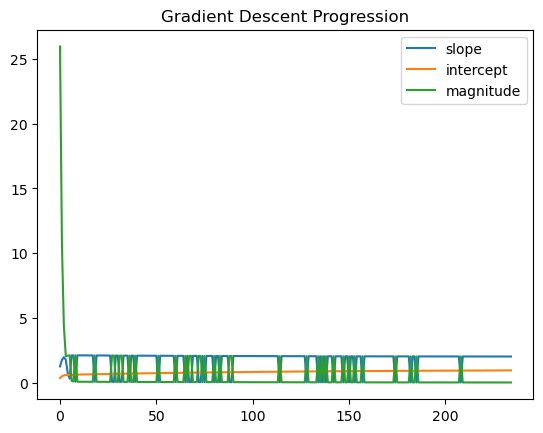

In [53]:
df.plot( y=['slope', 'intercept', 'magnitude'], kind='line', title='Gradient Descent Progression')


In [43]:
df

,intercept,slope,magnitude
0,0.350000,1.250000,25.961510
1,0.495000,1.760000,10.604244
2,0.556250,1.967750,4.331818
3,0.583275,1.770519,2.052050
4,0.596304,0.725999,2.085931
...,...,...,...
230,0.941696,2.016149,0.010314
231,0.942189,2.016013,0.010227
232,0.942678,2.015877,0.010141
233,0.943162,2.015743,0.010055


In [ ]:
# Example usage
model = SimpleLinearRegression()
model.fit(x_train, y_train)
print("Slope:", model.slope_)
print("Intercept:", model.intercept_)
print("Score:", model.score(x_test, y_test))
# Predicting new values
new_x = np.array([10, 20, 30])
predictions = model.predict(new_x)
print("Predictions for new values:", predictions)
